# Mean Field Demo

## Background

In this interactive demo we introduce the Mean field method to solve the foreground/background segmentation problem. 

First, we review the dynamical system models of neurons in the chapter. A neuron is described by two variables: a continuous valued variable $ u_i \in \{-\infty, \infty\} $, and a continuous variable $ q_i \in \{0, 1\} $. Roughly speaking, $ u_i $ represents the input to the cell body and $ q_i $ describes the probability that the cell will fire an action potential. These variables are related by the quations $ u_i = \log(\frac{q_i}{1 - q_i}) $.

The dynamics of the neuron is given by:

$$ \frac{d u_i}{d t} = - u_i + \sum_j W_{ij} I_{j} + \sum_k \theta_{ik} q_k $$

$ \sum_j w_{ij}I_j + \sum_k \theta_{ik}q_k $ represent the direct input and the input from the other neurons.

The definition of free energy is

$$ F(q) = - \sum_{ij} W_{ij} I_{j} q_{i} - \frac{1}{2} \sum_{ij} \theta_{ij} q_i q_j + \sum_i { q_i \log q_i + (1 - q_i) log (1 - q_i)} $$

The update rule of $ u_i $ can continually decreases the mean field free energy $ F(q) $, see the chapter for more detail.

In the image segmentation problem, we use $ q_i $ to represent the belief for foreground/background. Mean field algorithm is used to solve $ q_i $.

## Initialization
At the beginning, we need to initialize this demo by loading a few python libraries

In [119]:
# Initiialization code
%matplotlib inline
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import skimage.color, skimage.transform

## Load data
Then we load the image from a file, normalize it to be in range (-1, 1)

original range: 0.00561378787879 0.770716255013
remaped range: -1.0 1.0


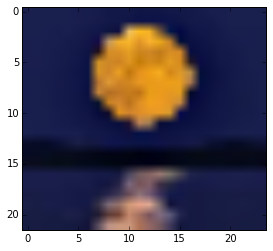

In [120]:
# im = plt.imread('../data/gibbs/gibbs_demo.jpg')
im = plt.imread('../data/gibbs/moon.jpg'); im = skimage.transform.rescale(im, 0.1)

plt.imshow(im)
grayim = skimage.color.rgb2gray(im)

# Linear map the data to -1, 1
scale = grayim.max() - grayim.min()
I = 2 * (grayim -grayim.min()) / scale - 1 
# I = (grayim - grayim.min()) / scale

print 'original range:', grayim.min(), grayim.max()
print 'remaped range:', I.min(), I.max()

## Run MFT algorithm

In [122]:
# Define a function to compute mean field free energy
def F(Q, I, W, Theta):
    E = 0
    E += - np.sum(W * I * Q)
    E += - 1/2 * Theta * (np.sum(np.roll(Q, 1, axis=0) * Q + np.roll(Q, -1, axis=0) * Q +
    np.roll(Q, 1, axis=1) * Q + np.roll(Q, -1, axis=1) * Q))
    E += np.sum(Q * np.log(Q) + (1-Q) * np.log(1-Q))
    return E

# Define logistic function
def logit(x):
    y = 1 / (1 + np.exp(-x))
    return y

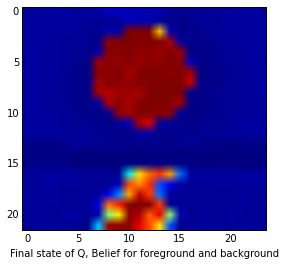

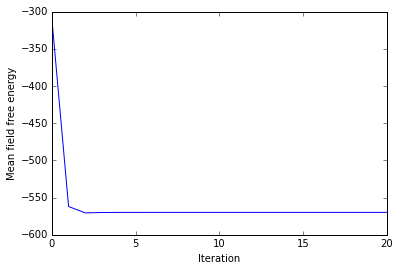

In [129]:
U = numpy.random.random(I.shape) # Initialize the state of neurons
Q = logit(U)

Theta = 1 # smoothness
W = 5 # data term

# plt.figure(); plt.imshow(Q); plt.xlabel('Initial state of Q')
energy = [F(Q,I,W,Theta)]
for i in np.arange(20):
    neighbor = np.roll(Q, 1, axis=0) + np.roll(Q, -1, axis=0)
    np.roll(Q, 1, axis=1) + np.roll(Q, -1, axis=1)
    dU = - U + neighbor * Theta + I * W
    U = dU + U  # Update U
    Q = logit(U)

    # plt.imshow(Q)
    energy.append(F(Q, I, W, Theta))
    
plt.figure(); plt.imshow(Q); plt.xlabel('Final state of Q, Belief for foreground and background')
plt.figure(); plt.plot(energy); plt.ylabel('Mean field free energy'); plt.xlabel('Iteration')

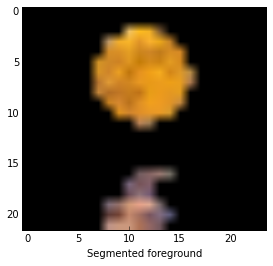

In [127]:
mask = Q>0.5
fg = im.copy()
for i in np.arange(3):
    fg[:,:,i] = fg[:,:,i] * (Q>0.5)
plt.imshow(fg); plt.xlabel('Segmented foreground')